Getting files (from pico do couto radar and INMET). First, we will compare just the year 2021: 

In [1]:
pc_path = "../data/PC-probative-analysis/RADAR-PC/2021/"
copa_path = "../data/PC-probative-analysis/"

Building a feature (csv) from images from Pico Do couto related to a region of interest. In this case, "FORTE COPACABANA".
We know the coordinates: Lat: -22.98833333, Long: -43.19055555

In [2]:
import pandas as pd 
import cv2 
import os 

Finding the points of Forte Copacabana in the picture (250x250), knowing the reference of Pico do Couto: Lat: -22.464278, Long: -43.297476

{"id":25,"nome":"Radar - Pico do Couto\/RJ","localidade":"pc","raio":250,"lat_center":"-22.464278","lon_center":"-43.297476","lon_min":"-45.7583","lon_max":"-40.8262","lat_min":"-24.701","lat_max":"-20.2013"}

Ranges of Lat and Long:

In [3]:
lon_min = -45.7583
lon_max = -40.8262
lat_min = -24.701
lat_max = -20.2013

rate_lon = lon_max - lon_min
rate_lat = lat_max - lat_min

In [4]:
#razão:
latitude_pc = 4.4997
longitude_pc = 4.9321
        
def pontos(x,y):
    
          long_pc, lat_pc = -22.464278, -43.297476

          dist_x =  (x - long_pc) 
          dist_y = (y - lat_pc)

          x1 = 125 - (dist_x * 250 / rate_lon)
          y1 = 125 + (dist_y * 250 / rate_lat)

          x1, y1 = round(x1), round(y1)

          return y1,x1

y1, x1 = pontos(-22.98833333, -43.19055555)

In [123]:
df_pc = pd.DataFrame()

for mouth in os.listdir(pc_path):
    mouth_path = os.path.join(pc_path, mouth)
    
    for day in os.listdir(mouth_path):
        day_path = os.path.join(mouth_path, day)
        
        for picture in os.listdir(day_path):
            file = os.path.join(day_path, picture)

            name_picture = str.replace(picture,".png","")
            image = cv2.imread(file)

            df_sum = pd.DataFrame()

            for i in range(x1-1, x1+2):
                for x in range(y1-1, y1+2):

                     pixel = image[y1, x1]

                     B = pixel[0]
                     G = pixel[1]
                     R = pixel[2]

                     dic = {"R": [R], "G": [G],"B": [B]}
            
                     d_colors = pd.DataFrame(dic)
                     d_colors["R"] = R
                     d_colors["G"] = G
                     d_colors["B"] = B
                     df_sum = pd.concat([df_sum,d_colors])
        
            df_final = pd.DataFrame(df_sum.mean(numeric_only=True))
            df_final = df_final.T
            df_final["timestamp"] = name_picture
            df_pc = pd.concat([df_final, df_pc])
            


Devemos construir a escala antes de agrupar por hora? ou não? Se os valores em RGB representam uma escala com o potencial de precipitação, a média dos valores RGB representarão um potencial médio de precipitação?


Convertendo para resolução horária:

In [124]:
df_pc['hour'] = df_pc['timestamp'].str[:14]
df_pc = df_pc.groupby('hour').median()

In [134]:
df_copa = pd.read_csv("../data/PC-probative-analysis/inmetcopa.csv", skiprows=8)
df_copa

,Data,Hora UTC,PRECIPITACAO TOTAL,HORARIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO,HORARIA (mB),PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m),TEMPERATURA DO AR - BULBO SECO,...,VENTO.1,RAJADA MAXIMA (m/s),VENTO.2,VELOCIDADE HORARIA (m/s),Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,2021/01/01,0000 UTC,NaN,6.0,1008.0,7.0,1008.0,7.0,1008.0,2.0,...,2.0,90.0,80.0,89.0,289.0,7.0,4.0,2.0,9.0,NaN
1,2021/01/01,0100 UTC,0.0,1009.0,3.0,1009.0,3.0,1008.0,6.0,NaN,...,84.0,86.0,241.0,5.0,7.0,2.0,1.0,NaN,NaN,NaN
2,2021/01/01,0200 UTC,0.0,1008.0,9.0,1009.0,3.0,1008.0,8.0,NaN,...,89.0,82.0,82.0,348.0,5.0,3.0,1.0,NaN,NaN,NaN
3,2021/01/01,0300 UTC,0.0,1008.0,4.0,1009.0,1008.0,4.0,NaN,6.0,...,84.0,77.0,80.0,221.0,3.0,5.0,NaN,8.0,NaN,NaN
4,2021/01/01,0400 UTC,0.0,1007.0,6.0,1008.0,4.0,1007.0,5.0,0.0,...,78.0,83.0,274.0,2.0,6.0,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2021/12/31,1900 UTC,NaN,4.0,1003.0,3.0,1003.0,7.0,1003.0,3.0,...,1.0,92.0,91.0,91.0,89.0,5.0,2.0,1.0,5.0,NaN
8756,2021/12/31,2000 UTC,NaN,2.0,1003.0,2.0,1003.0,3.0,1003.0,1.0,...,89.0,89.0,99.0,5.0,8.0,3.0,2.0,NaN,NaN,NaN
8757,2021/12/31,2100 UTC,NaN,2.0,1003.0,5.0,1003.0,5.0,1003.0,2.0,...,7.0,89.0,88.0,88.0,93.0,6.0,2.0,9.0,NaN,NaN
8758,2021/12/31,2200 UTC,0.0,1003.0,6.0,1003.0,7.0,1003.0,4.0,13.0,...,4.0,88.0,84.0,84.0,83.0,5.0,3.0,2.0,2.0,NaN


In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [46]:
def define_value(min,max,c_min,c_max,rgb):

  min_rgb = np.array(c_min)
  max_rgb = np.array(c_max)
  rgb = np.array(rgb)

  normalized_min = min_rgb/255
  normalized_max = max_rgb /255
  normalized_value = rgb/255

  weights = np.array([0.2989, 0.5870, 0.1140])
  linear_value_min = np.dot(normalized_min, weights)
  linear_value_max = np.dot(normalized_max, weights)
  linear_value = np.dot(normalized_value, weights)

  new_min = min
  new_max = max

  scaled_value = new_min + ((abs(linear_value-linear_value_min)*(new_max-new_min))/abs(linear_value_max-linear_value_min))
  return scaled_value

In [133]:
# 135,255,255 azul
# 1,2,246

# 0,254,0  verde
# 0,154,0

# 255,254,0 amarelo/laranja
# 255,154,0

# 253,0,0 vermelho
# 196,0,1

# 254,1,255 lilás 
# 152,87,202


In [36]:
def create_scale(row):
    
    R = row['R']
    G = row['G']
    B = row['B']
    
    if R == 0 and G == 0 and B == 0:
        return 0
    
    
    if B <= 2:

        if G < 2:
            min = [253,0,0]
            max = [196,0,1]
            value = define_value(25,90,min,max,[R,G,B])
            return value
        
        if R < 2:
            min = [0,254,0]
            max = [0,154,0]
            value = define_value(1,11,min,max,[R,G,B])
            return value
        
        else:
            min = [255,254,0]
            max = [255,154,0]
            value = define_value(11,25,min,max,[R,G,B])
            return value
        
    else:
        if R > 145:
            min = [254,1,255]
            max = [152,87,202]
            value = define_value(90,100,min,max,[R,G,B])
            return value
        else:
            min = [253,0,0]
            max = [196,0,1]
            value = define_value(0,1,min,max,[R,G,B])
            return value

In [126]:
df_pc['scale'] = df_pc.apply(create_scale, axis=1)

In [132]:
id = df_pc['scale'].idxmax()
id

'2021-02-11--18'

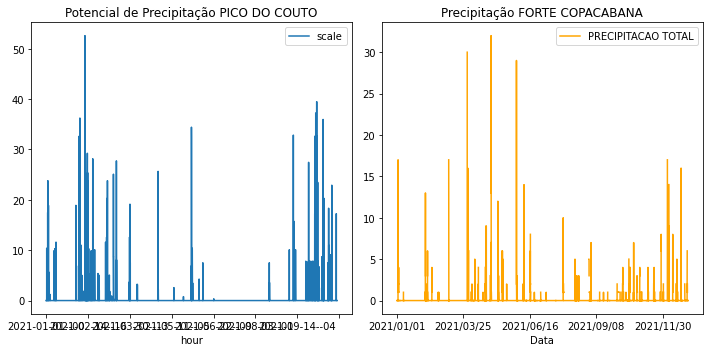

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

df_pc.plot( y='scale', ax=axes[0])
axes[0].set_title('Potencial de Precipitação PICO DO COUTO')

df_copa.plot(x='Data', y='PRECIPITACAO TOTAL', ax=axes[1], color='orange')
axes[1].set_title('Precipitação FORTE COPACABANA')

plt.tight_layout()
plt.show()

In [128]:
df_pc.max()

R        254.000000
G        253.000000
B        253.000000
scale     52.594264
dtype: float64